In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import soundfile as sf
from pydub import AudioSegment
from pydub.playback import play 

'C:\Users\JH\Downloads\asdlknads.wav' 파일 정보:
샘플링 레이트: 44100 Hz
오디오 데이터 형태: (12544000, 2)
오디오 데이터 타입: int16
스테레오 파일을 모노로 변환 (첫 번째 채널 사용), 새로운 형태: (12544000,)
재생 시간: 284.44 초


C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Deja

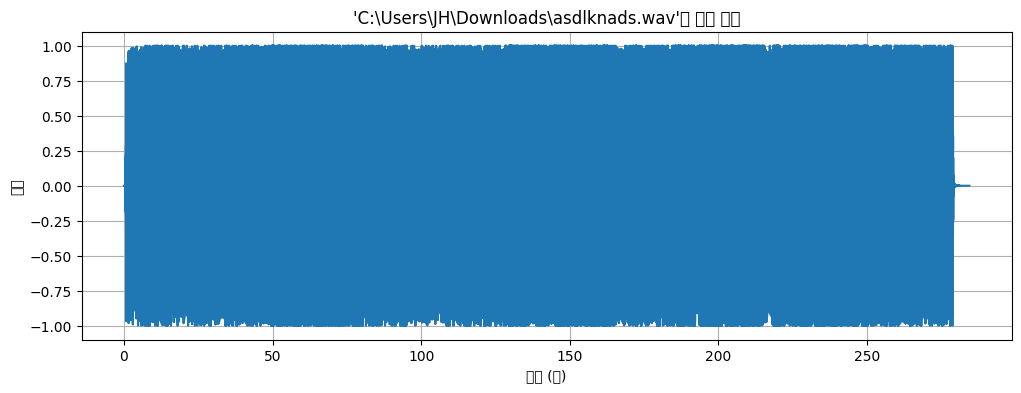

C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


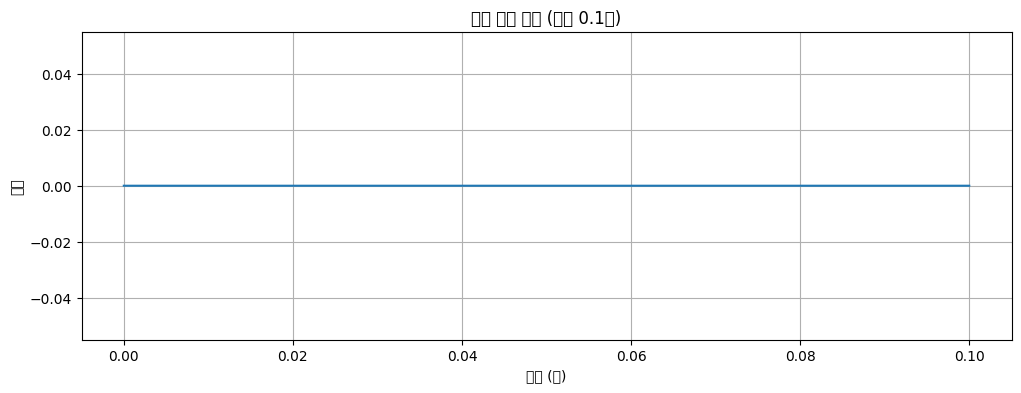


--- 마이크로 음성 녹음 ---
3초 동안 녹음을 시작합니다. 말하세요...

마이크 녹음 중 오류 발생: type object 'AudioSegment' has no attribute 'from_adc'
마이크 설정 또는 PyAudio 설치를 확인해 주세요.


In [7]:
#file_path = "C:\Users\JH\Downloads\Phone Link\asdlknads.mp3" # 여기에 실제 WAV 파일 경로를 입력하세요.
file_path = r"C:\Users\JH\Downloads\asdlknads.wav"
try:
    samplerate, data = wavfile.read(file_path)
    print(f"'{file_path}' 파일 정보:")
    print(f"샘플링 레이트: {samplerate} Hz")
    print(f"오디오 데이터 형태: {data.shape}")
    print(f"오디오 데이터 타입: {data.dtype}")

    # 스테레오(2채널)인 경우 첫 번째 채널만 사용
    if data.ndim > 1:
        data = data[:, 0]
        print(f"스테레오 파일을 모노로 변환 (첫 번째 채널 사용), 새로운 형태: {data.shape}")

    # 데이터 타입이 int16이 아니거나 정규화가 필요한 경우 (matplotlib 시각화 시 유리)
    if data.dtype == 'int16':
        data_normalized = data / (2**15) # int16의 최대값으로 정규화
    elif data.dtype == 'int32':
        data_normalized = data / (2**31)
    elif data.dtype == 'float32' or data.dtype == 'float64':
        data_normalized = data # 이미 float인 경우
    else:
        print("경고: 지원하지 않는 데이터 타입입니다. 시각화에 문제가 있을 수 있습니다.")
        data_normalized = data.astype(np.float32) / np.max(np.abs(data)) # 임시 정규화

    duration = len(data) / samplerate
    print(f"재생 시간: {duration:.2f} 초")

except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 파일 경로를 확인해 주세요.")
    print("아래 마이크 녹음 코드를 실행하여 새 파일을 생성하거나, 샘플 파일을 다운로드하세요.")
    data_normalized = None # 파일이 없으면 시각화 건너뛰기
except Exception as e:
    print(f"파일을 읽는 중 오류 발생: {e}")
    data_normalized = None


# --- 2. 음성 파형 시각화 ---
if data_normalized is not None:
    time = np.linspace(0., duration, len(data_normalized))

    plt.figure(figsize=(12, 4))
    plt.plot(time, data_normalized)
    plt.xlabel("시간 (초)")
    plt.ylabel("진폭")
    plt.title(f"'{file_path}'의 음성 파형")
    plt.grid(True)
    plt.show()

    # 특정 구간 확대 시각화 (예: 처음 0.1초)
    zoom_in_time = 0.1 # 확대할 시간 (초)
    samples_to_show = int(samplerate * zoom_in_time)
    if samples_to_show > 0 and samples_to_show <= len(data_normalized):
        plt.figure(figsize=(12, 4))
        plt.plot(time[:samples_to_show], data_normalized[:samples_to_show])
        plt.xlabel("시간 (초)")
        plt.ylabel("진폭")
        plt.title(f"음성 파형 확대 (처음 {zoom_in_time}초)")
        plt.grid(True)
        plt.show()
    else:
        print(f"경고: {zoom_in_time}초 확대 시각화가 불가능합니다. 파일 길이가 너무 짧을 수 있습니다.")


# --- 3. 마이크로 음성 녹음하여 WAV 파일로 저장 ---
# pydub는 내부적으로 PyAudio를 사용하여 마이크 녹음을 처리합니다.
# PyAudio 설치: pip install PyAudio
# Windows에서는 pip install pipwin 후 pipwin install pyaudio 를 시도해볼 수 있습니다.
# 설치에 문제가 있다면 2번까지만 진행해도 무방합니다.

try:
    print("\n--- 마이크로 음성 녹음 ---")
    print("3초 동안 녹음을 시작합니다. 말하세요...")
    record_seconds = 3
    # 녹음 시작 (AudioSegment의 from_device_or_file 메서드 활용)
    # device=None은 기본 마이크를 사용한다는 의미
    # channels=1은 모노 녹음
    # sample_rate는 녹음 샘플링 레이트
    audio = AudioSegment.from_adc(
        duration_s=record_seconds,
        channels=1,
        sample_rate=samplerate if 'samplerate' in locals() else 16000 # 이전 파일의 샘플링 레이트 또는 기본 16kHz 사용
    )

    output_filename = "my_recorded_audio.wav"
    audio.export(output_filename, format="wav")
    print(f"녹음 완료! '{output_filename}'으로 저장되었습니다.")

    # 녹음된 파일 재생 (선택 사항)
    # play(audio)
    # print("녹음된 오디오를 재생합니다...")

except ImportError:
    print("\n경고: PyAudio 또는 simpleaudio가 설치되지 않아 마이크 녹음/재생을 건너뜁니다.")
    print("마이크 녹음 및 재생을 원하시면 'pip install PyAudio' 또는 'pip install simpleaudio'를 시도해 보세요.")
except Exception as e:
    print(f"\n마이크 녹음 중 오류 발생: {e}")
    print("마이크 설정 또는 PyAudio 설치를 확인해 주세요.")


# --- 4. MP3 파일 로드 및 WAV로 변환 (선택 사항) ---
# MP3 파일을 다루려면 ffmpeg 설치가 필요합니다.
# ffmpeg 설치 가이드: https://ffmpeg.org/download.html (설치 후 PATH 환경 변수 설정 필요)
# ffmpeg 설치가 어렵다면 이 부분은 건너뛰셔도 됩니다.

# mp3_file_path = 'sample.mp3' # MP3 파일 경로를 입력하세요.
# output_wav_path = 'converted_from_mp3.wav'

# try:
#     print(f"\n--- MP3 파일 로드 및 WAV 변환 ---")
#     mp3_audio = AudioSegment.from_mp3(mp3_file_path)
#     mp3_audio.export(output_wav_path, format="wav")
#     print(f"'{mp3_file_path}' 파일을 '{output_wav_path}'로 변환했습니다.")
# except FileNotFoundError:
#     print(f"경고: '{mp3_file_path}' 파일을 찾을 수 없습니다. MP3 변환을 건너뜁니다.")
# except Exception as e:
#     print(f"경고: MP3 변환 중 오류 발생 (FFmpeg 미설치 또는 경로 문제일 수 있습니다): {e}")


C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JH\anaconda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) Deja

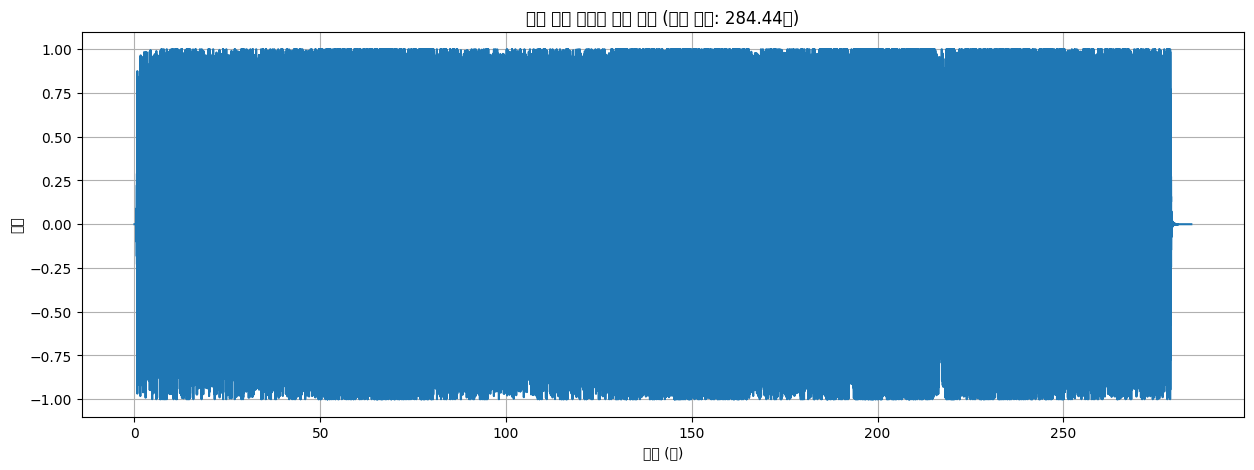

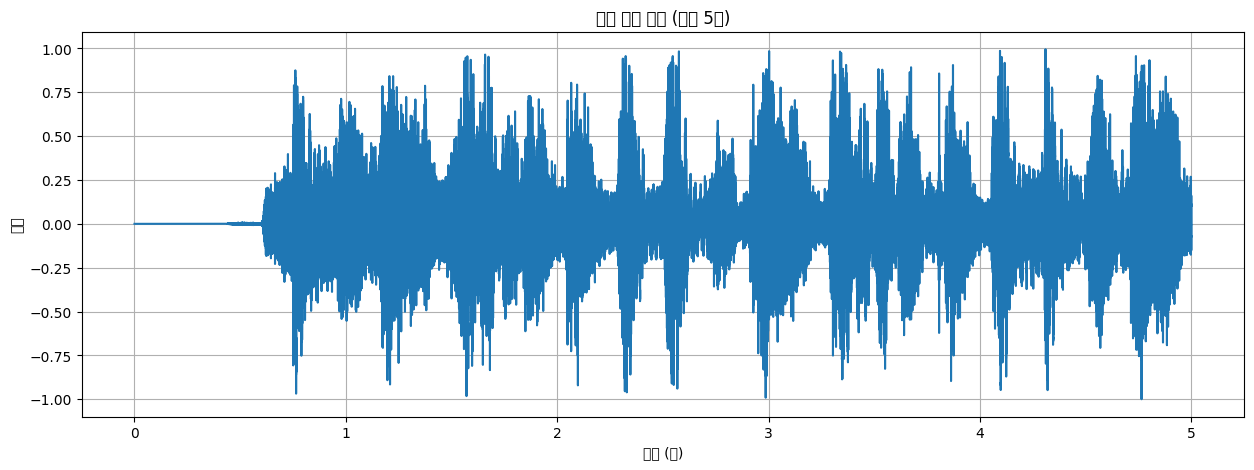

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 위에서 얻은 변수들을 가정합니다.
# samplerate = 44100
# data_normalized = (스테레오를 모노로 변환하고 정규화된 데이터)
# duration = 284.44

# 시간 축 생성
time = np.linspace(0., duration, len(data_normalized))

plt.figure(figsize=(15, 5)) # 그래프 크기를 좀 더 키워서 길이에 대비
plt.plot(time, data_normalized)
plt.xlabel("시간 (초)")
plt.ylabel("진폭")
plt.title(f"현재 음성 파일의 전체 파형 (재생 시간: {duration:.2f}초)")
plt.grid(True)
plt.show()

# 특정 구간 확대 시각화 (예: 처음 5초) - 파일이 길어서 0.1초보다는 5초 정도로 늘려보는 것이 좋습니다.
zoom_in_time = 5 # 확대할 시간 (초)
samples_to_show = int(samplerate * zoom_in_time)

if samples_to_show > 0 and samples_to_show <= len(data_normalized):
    plt.figure(figsize=(15, 5))
    plt.plot(time[:samples_to_show], data_normalized[:samples_to_show])
    plt.xlabel("시간 (초)")
    plt.ylabel("진폭")
    plt.title(f"음성 파형 확대 (처음 {zoom_in_time}초)")
    plt.grid(True)
    plt.show()
else:
    print(f"경고: {zoom_in_time}초 확대 시각화가 불가능합니다. 파일 길이가 너무 짧을 수 있습니다.")

네, 질문하신 내용에 대한 해석이 **대부분 맞지만, 몇 가지 용어와 개념을 조금 더 정확하게** 짚어 드릴게요.

---

### 질문에 대한 답변 상세 해설

1.  **"44100으로 샘플링 레이트를 잡은 건 모든 가청 주파수를 대상으로 한 거고"**
    * **네, 이 부분은 맞습니다.**
    * 사람의 가청 주파수 범위는 대략 20Hz ~ 20,000Hz (20kHz)입니다.
    * **나이퀴스트 정리(Nyquist Theorem)**에 따르면, 원본 신호의 최고 주파수($f_{max}$)를 정확하게 재구성하려면 그 두 배 이상의 샘플링 레이트($f_s \ge 2 \times f_{max}$)가 필요합니다.
    * 따라서 최고 가청 주파수인 20kHz를 커버하려면 최소 40kHz의 샘플링 레이트가 필요합니다.
    * **44.1kHz (44100 Hz)**는 오디오 CD 표준으로, 20kHz 이상의 주파수까지 충분히 커버하여 사람의 귀에 들리는 모든 소리 정보를 담을 수 있는 샘플링 레이트입니다. 그래서 '모든 가청 주파수를 대상으로 한 것'이라는 표현이 적절합니다.

2.  **"자르는 구간이 3초마다"**
    * **이 부분은 약간의 오해를 불러일으킬 수 있는 표현입니다.**
    * 여기서 3초는 **'샘플링 간격'** 이 아니라 **'녹음 지속 시간(duration)'** 을 의미합니다.
    * **샘플링(Sampling)** 은 소리 파형을 **시간 축을 따라 매우 짧은 간격(예: 1/44100초마다)** 으로 잘라서 디지털 값으로 바꾸는 과정입니다. 44100Hz 샘플링 레이트는 1초에 44,100번 샘플을 "잘라서" 값을 얻는다는 뜻입니다.
    * 코드를 다시 보시면, `duration = 3`은 `sd.rec` 함수가 **몇 초 동안 오디오를 녹음할지**를 설정하는 부분입니다. 즉, "3초 길이의 오디오를 녹음한다"는 의미이지, "3초마다 특정 작업을 반복한다"는 의미가 아닙니다.

3.  **"모노 채널로 자른다는 의미 맞아?"**
    * **이 부분은 맞습니다.**
    * `channels = 1`은 마이크로부터 오디오를 녹음할 때 **모노(단일 채널)로 녹음**하겠다는 것을 명시합니다.
    * 만약 `channels = 2`로 설정했다면 스테레오로 녹음되었을 것이고, 이 경우 저장된 데이터는 `(샘플 수, 2)` 형태가 되었을 것입니다. 모노로 설정했기 때문에 녹음 데이터는 `(샘플 수,)` 형태의 1차원 배열이 됩니다.
    * 또한, 기존 WAV 파일을 로드할 때 `data = data[:, 0]`을 사용하여 스테레오 파일의 첫 번째 채널을 선택하는 것도 "모노 채널로 자른다"는 표현과 일맥상통합니다.

---

**정리:**

* **샘플링 레이트 (44100 Hz):** 1초에 44,100번 데이터를 기록하여, 사람의 귀에 들리는 대부분의 소리 정보를 담을 수 있는 **'소리의 해상도'**를 결정합니다.
* **Duration (3초):** 마이크를 통해 **녹음할 오디오의 총 길이**를 3초로 정하겠다는 의미입니다.
* **Channels (모노):** 오디오를 단일 채널로 처리하거나 녹음하겠다는 의미입니다.

이제 더 명확하게 이해되셨기를 바랍니다!

`sd.rec(int(duration * fs), samplerate=fs, channels=channels, dtype='int16')` 코드에서 `duration` 매개변수를 통해 몇 초 동안 오디오를 녹음할지를 설정하는 것은 여러 가지 중요한 이유가 있습니다.

1.  **자원 관리 및 효율성:**
    * **메모리 제한:** 오디오 데이터는 샘플링 레이트(fs)와 시간(duration)에 비례하여 메모리를 많이 차지합니다. 예를 들어, 44.1kHz 모노 16비트 오디오는 1초에 약 88KB의 메모리가 필요합니다. 1시간 녹음 시 약 316MB가 됩니다. 무한정 녹음하면 컴퓨터의 메모리가 부족해지거나 시스템 성능이 저하될 수 있습니다. `duration`을 설정하여 필요한 만큼의 메모리만 할당하도록 합니다.
    * **파일 크기 제한:** 녹음된 데이터는 결국 파일로 저장되는데, 녹음 시간이 길어질수록 파일 크기가 기하급수적으로 커집니다. 저장 공간을 효율적으로 사용하고, 파일을 다루기 쉽게 만들기 위해 녹음 시간을 제한할 필요가 있습니다.
    * **처리 시간 제어:** 녹음된 데이터를 후처리(예: 음성 인식 모델에 입력)할 때, 데이터의 길이가 길면 처리 시간도 길어집니다. 특정 시간으로 제한함으로써 응답 시간을 예측하고 제어할 수 있습니다.

2.  **사용자 인터페이스 및 경험 (UX):**
    * **명확한 기대치:** 사용자에게 "3초 동안 말하세요"와 같이 녹음 시간을 명확하게 알려줌으로써 사용자가 언제 말해야 하고 언제 멈춰야 할지 알 수 있게 합니다.
    * **불필요한 녹음 방지:** 사용자가 실수로 녹음 버튼을 계속 누르고 있거나, 의도치 않은 긴 시간 동안 녹음되는 것을 방지합니다.

3.  **애플리케이션 로직 및 목적:**
    * **명령어 입력:** "헤이 클로바"처럼 짧은 음성 명령어를 인식하는 시스템이라면, 보통 몇 초 이내의 짧은 녹음만 필요합니다. 불필요하게 긴 녹음을 받을 이유가 없습니다.
    * **대화형 시스템:** 챗봇과의 대화에서 사용자의 발화는 보통 몇 초 이내입니다. 사용자의 발화가 끝나면 녹음을 멈추고 다음 처리를 진행해야 하므로, 최대 녹음 시간을 설정하는 것이 일반적입니다.
    * **세그먼트 분리:** 긴 오디오 스트림에서 음성 활동 감지(VAD) 등을 통해 의미 있는 구간(세그먼트)을 추출할 때, 각 세그먼트의 최대 길이를 제한하여 처리 단위를 설정할 수 있습니다.
    * **타이머 기반 작업:** 특정 시간 동안만 오디오를 캡처해야 하는 타이머 기반 애플리케이션에서 필수적인 설정입니다.

4.  **오류 방지 및 안정성:**
    * `sd.wait()`와 같은 블로킹 함수는 녹음이 끝날 때까지 기다리는데, 만약 녹음 시간이 무한정이라면 프로그램이 멈춘 것처럼 보일 수 있습니다. `duration`을 설정하면 `sd.wait()`가 언제 끝날지 예측 가능하여 프로그램의 안정성을 높입니다.

요약하자면, `duration` 설정은 **자원 효율성, 사용자 편의성, 애플리케이션의 특정 목적 달성, 그리고 시스템의 안정성**을 위해 필수적인 요소입니다. 단순히 오디오를 "자르는" 개념을 넘어, 녹음 세션의 "길이"를 결정하는 중요한 파라미터라고 이해하시면 됩니다.
녹음 시 '몇 초 동안 오디오를 녹음할지'를 설정하는 `duration` (지속 시간) 파라미터가 필요한 이유는 다음과 같습니다.

### 1. 자원 관리 및 효율성

* **메모리 및 저장 공간 관리:** 마이크에서 들어오는 오디오 데이터는 초당 수만 개의 샘플(예: 44.1kHz 샘플링 레이트 시 1초에 44,100개 샘플)을 생성합니다. 녹음 시간을 제한하지 않으면, 컴퓨터의 메모리나 저장 공간이 빠르게 소진될 수 있습니다. 특히 실시간 시스템이 아닌 이상, 무한정 녹음을 할 수는 없습니다.
* **파일 크기 제어:** 녹음되는 오디오 파일의 크기를 예측하고 제어할 수 있습니다. 예를 들어, 웹에 업로드하거나 전송해야 하는 오디오 파일이라면 특정 크기 이하로 제한해야 할 필요가 있습니다.

### 2. 사용 편의성 및 인터랙션

* **명확한 사용자 경험:** 사용자가 "녹음 시작" 버튼을 누르면, 언제 녹음이 끝날지 알아야 합니다. `duration`을 설정해 두면 "3초 동안 말하세요"와 같이 사용자에게 명확한 가이드라인을 제공할 수 있습니다.
* **특정 작업에 최적화:** 음성 명령을 처리하거나, 짧은 오디오 클립을 수집하는 등의 특정 애플리케이션에서는 정해진 길이의 오디오만 필요할 수 있습니다. 예를 들어, "하이 빅스비"와 같은 웨이크 워드(Wake Word)를 인식하는 시스템은 짧은 순간의 오디오만 필요합니다.

### 3. 오류 방지 및 안정성

* **비정상적인 종료 방지:** 사용자가 실수로 녹음을 끄지 않거나, 프로그램에 예상치 못한 문제가 발생했을 때 무한정 녹음되는 것을 방지하여 시스템의 안정성을 유지합니다.
* **디버깅 용이:** 개발 및 테스트 단계에서 짧은 시간 동안만 녹음하여 데이터가 어떻게 기록되는지 빠르게 확인하고 디버깅할 수 있습니다.

### 4. 실시간 처리의 복잡성

* **실시간 스트리밍 vs. 고정 길이:** 마이크에서 들어오는 데이터를 `duration` 없이 계속 처리하려면, 실시간 스트리밍 방식으로 데이터를 버퍼링하고 처리해야 합니다. 이는 구현이 더 복잡해집니다. 고정된 `duration`은 데이터를 한 번에 모아서 처리하기 쉽게 만듭니다.

### 요약하자면:

`duration` 설정은 프로그램의 **자원 효율성, 사용 편의성, 안정성, 그리고 구현의 용이성**을 위해 필수적인 요소입니다. "마이크로 녹음 시작" 명령은 보통 녹음의 시작점만을 지시하고, 언제 멈출지는 별도의 종료 신호(예: 사용자가 버튼을 누르거나, 특정 시간이 지남)가 필요하기 때문입니다. `duration`은 그 중 가장 일반적이고 간단한 자동 종료 조건 중 하나입니다.


=================================================================


음, 결론적으로 말씀드리면 **"데이터를 분할해서 순서대로 보관하는 작업의 '일종'이라고 보기는 어렵습니다."**

조금 더 정확히 말씀드리자면, `duration`은 **'캡처(Capture)할 오디오의 최대 길이'**를 설정하는 것이고, 이는 데이터를 능동적으로 "분할"하는 개념과는 다릅니다.

**예시를 통해 다시 설명해 드릴게요.**

* **A: 3초 `duration`을 설정하고 녹음 버튼을 1번 누르는 경우:**
    * 3초짜리 오디오 파일 (1개) 생성.
    * 이것은 분할 작업이라기보다, 그냥 **3초짜리 한 조각**을 만든 것입니다.

* **B: 긴 10분짜리 오디오 파일이 이미 있고, 이것을 3초씩 잘라서 분석하는 경우:**
    * 10분짜리 파일을 3초, 3초, 3초... 이렇게 **작은 조각들로 나누는 행위**가 '분할 작업'에 해당합니다.
    * 이때 각 3초 조각을 '청크(chunk)'라고 부를 수 있습니다.

`duration`은 A 시나리오에서 "얼마나 길게 녹음할 것인가"를 결정하는 것이지, B 시나리오처럼 "이미 있는 긴 것을 어떻게 나눌 것인가"를 직접적으로 수행하는 것은 아닙니다.

따라서 `duration`을 '데이터를 분할하는 작업'의 일종이라고 이해하는 것은 **적절하지 않습니다.** `duration`은 **한 번의 작업으로 생성될 오디오의 '길이 제한'**이라고 이해하시는 것이 가장 정확합니다.

음성 처리에서 "분할"이라고 하면 보통 오디오를 시간 축으로 나누거나, 주파수 축으로 나누


네, 그럼 `duration`을 비유하는 다른 방법을 생각해 봅시다.

`duration`은 **'한 번의 요청으로 얻게 될 결과물의 길이'**를 미리 정하는 것과 비슷합니다.

가장 좋은 비유는 다음과 같습니다:

1.  **사진 찍기 비유:**
    * **일반적인 사진:** 셔터를 한 번 누르면 한 장의 사진이 찍힙니다. 이 사진은 "한 순간"의 이미지입니다.
    * **`duration`이 있는 녹음:** 동영상 카메라로 "3초 동안 촬영" 버튼을 누르는 것과 같습니다. 결과물은 3초 길이의 **하나의 비디오 클립**입니다. 이 클립은 3초 동안의 연속적인 움직임을 담고 있지만, 그 자체로 여러 개의 작은 클립으로 "분할된" 것은 아닙니다. 그냥 "3초짜리 한 덩어리"인 거죠.

    * **핵심:** '시간'이라는 연속적인 흐름 속에서 **'얼마나 긴 덩어리를 잘라낼 것인가'**를 지정하는 역할입니다.

2.  **물 받기 비유:**
    * 수도꼭지에서 물을 받을 때, "3초 동안만 물을 틀겠다"고 미리 정해놓는 것과 같습니다.
    * 3초가 지나면 수도꼭지가 자동으로 잠기고, 3초 동안 받은 물이 하나의 물통에 담깁니다.
    * 이 3초 동안 받은 물은 "분할된" 것이 아니라, **총 3초 분량의 물**인 거죠.

3.  **빵 굽기 비유:**
    * 오븐에 빵을 구울 때 "15분 동안만 굽겠다"고 타이머를 설정하는 것과 같습니다.
    * 15분 후 오븐이 꺼지면, 15분 동안 구워진 **하나의 빵**이 완성됩니다. 빵이 여러 조각으로 나뉘어 구워진 것은 아닙니다.

이 비유들은 `duration`이 **'한 번의 작업(녹음, 촬영, 물 받기 등)으로 생성될 결과물의 총 길이'**를 제어한다는 것을 더 명확하게 보여줍니다. '분할'이라는 개념보다는 '길이 제한' 또는 '크기 지정'에 더 가깝습니다.

이 비유들이 `duration`의 역할을 이해하는 데 도움이 되었기를 바랍니다!는 등의 다른 개념을 떠올립니다.